<a href="https://colab.research.google.com/github/shivangibithel/IRMiDis_Task2/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Transformer and imports

In [ ]:
pip install transformers

In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import math
import seaborn as sn
import tensorflow as tf
import tensorflow_datasets as tfds
from bs4 import BeautifulSoup
from sklearn import metrics as sk_metrics
import nltk
import re

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [ ]:
# folder = '/content/gdrive/My Drive/corona-tweet-sent'
# train_f = 'Corona_NLP_train.csv'
# test_f = 'Corona_NLP_test.csv'

# df_train = pd.read_csv(os.path.join(folder, train_f), engine='python')
# df_test = pd.read_csv(os.path.join(folder, test_f), engine='python')

# Data read and split...for some accuracy numbers

In [3]:
our_data = pd.read_csv("irmidis-2021-task2-train.csv")
from sklearn.utils import shuffle
our_data = shuffle(our_data)
# df_train = pd.read_csv("irmidis-2021-task2-train.csv")
# df_test = pd.read_csv("irmidis-2021-task2-test.csv")
# df_train = our_data[:2233]
# df_test = our_data[2234:]

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
df = our_data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_valid_index in split.split(df, df.label):
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_valid_index]

In [ ]:
# col_list = ["id", "tweet", "label"]
# our_data = pd.read_csv("resampled_data.csv", usecols=col_list)
# from sklearn.utils import shuffle
# # our_data = shuffle(our_data)
# # df_train = pd.read_csv("irmidis-2021-task2-train.csv")
# # df_test = pd.read_csv("irmidis-2021-task2-test.csv")
# df_train = our_data
# df_test = our_data

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 2634 to 2114
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2233 non-null   int64 
 1   tweet   2233 non-null   object
 2   label   2233 non-null   object
dtypes: int64(1), object(2)
memory usage: 69.8+ KB


In [7]:
df_train.label.value_counts()

Neutral    808
ProVax     792
AntiVax    633
Name: label, dtype: int64

In [8]:
our_data.label.value_counts()

Neutral    1010
ProVax      991
AntiVax     791
Name: label, dtype: int64

In [9]:
df_train.head()

,id,tweet,label
2634,1327378919838916610,Trump says coronavirus vaccine won't be delive...,Neutral
241,1334524947809579009,"Clinton, Bush, Obama volunteer to publicly rec...",Neutral
438,1325770346868338688,"Pfizer, BioNTech say their COVID-19 vaccine is...",Neutral
91,1325770359090647040,Pfizer says early analysis shows its Covid-19 ...,Neutral
2670,1325770338517606400,Covid vaccine: First vaccine offers 90% protec...,Neutral


In [10]:
df_train['tweet'].iloc[0]

"Trump says coronavirus vaccine won't be delivered to New York “until we have authorization [from Cuomo] to do so”.\n\nShameless liars here👇 https://t.co/Fin7CVzQWh"

In [11]:
y_map = {
    'ProVax': 0, 
    'AntiVax': 1, 
    'Neutral': 2
}

df_train['Sentiment_Cat'] = df_train['label'].map(y_map)
df_test['Sentiment_Cat'] = df_test['label'].map(y_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Pre-processing

In [ ]:
# nltk.download('stopwords')
# stop_words = nltk.corpus.stopwords.words('english')

# def clean_text(data):
#     data = data.lower()
#     data = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', data)
#     data = re.sub(r'([^a-zA-Z\s])', '', data)
#     data = data.split()
#     temp = []
#     for i in data:
#         if i not in stop_words:
#             temp.append(i)
#     data = ' '.join(temp)
#     return data

# df_train['tweet_cleaned'] = df_train['tweet'].apply(clean_text)
# df_test['tweet_cleaned'] = df_test['tweet'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from sklearn.feature_extraction import stop_words
stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc): #doc is a string of text
    # doc = doc.replace("@", " ")
    # doc = doc.replace(" ", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # doc = " ".join([token for token in doc.split() if token not in stopwords])
    #remove punctuation and numbers
    return doc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
import string
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_url(data):
  url = re.compile("http[s]?\:\/\/.[a-zA-Z0-9\.\/\_?=%&#\-\+!]+", re.UNICODE)
  return re.sub(url, '', data)

In [ ]:
def clean_text():
  df_train['tweet_cleaned'] = df_train['tweet'].apply(remove_url)
  df_train['tweet_cleaned'] = df_train['tweet_cleaned'].apply(clean)
  df_train['tweet_cleaned'] = df_train['tweet_cleaned'].apply(remove_emojis)
  df_test['tweet_cleaned'] = df_test['tweet'].apply(remove_url)
  df_test['tweet_cleaned'] = df_test['tweet_cleaned'].apply(clean)
  df_test['tweet_cleaned'] = df_test['tweet_cleaned'].apply(remove_emojis)

clean_text()
# df_train['tweet_cleaned'] = df_train['tweet'].apply(remove_url,clean,remove_emojis)
# df_test['tweet_cleaned'] = df_test['tweet'].apply(remove_url,clean,remove_emojis)
# for i in range(len(our_data)):
#   our_data.tweet.iloc[i] = remove_url(our_data.tweet.iloc[i])
#   our_data.tweet.iloc[i] = clean(our_data.tweet.iloc[i])
#   our_data.tweet.iloc[i] = remove_emojis(our_data.tweet.iloc[i])

In [15]:
df_train['tweet_cleaned'].iloc[0]

'Trump says coronavirus vaccine wont be delivered to New York “until we have authorization from Cuomo to do so”\n\nShameless liars here '

In [16]:
x_train, y_train = df_train['tweet_cleaned'].values, np.array(df_train['Sentiment_Cat'], dtype=np.int64)
x_test, y_test = df_test['tweet_cleaned'].values, np.array(df_test['Sentiment_Cat'], dtype=np.int64)

# BERT

In [17]:
from tokenizers import BertWordPieceTokenizer
import transformers

In [ ]:
# trying to incorporate covid-twitter-bert here
# from transformers import (
#    AutoConfig,
#    AutoTokenizer,
#    TFAutoModelForSequenceClassification,
#    AdamW,
#    glue_convert_examples_to_features
# )
# from transformers import AutoConfig, AutoModel
# import tensorflow as tf
# import tensorflow_datasets as tfds
# import json
# tokenizer = AutoTokenizer.from_pretrained("digitalepidemiologylab/covid-twitter-bert")
# model = AutoModel.from_pretrained("digitalepidemiologylab/covid-twitter-bert")

In [18]:
# First load the real tokenizer
# tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased' , lower=True)
tokenizer = transformers.BertTokenizerFast.from_pretrained('bert-base-uncased', lower=True)

# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')

# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=True)
fast_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=True, wordpieces_prefix=##)

In [19]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=200):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [20]:
data = df_train
Neutral_data = data[data['Sentiment_Cat'] == 2]
Antivax_data = data[data['Sentiment_Cat'] == 1]
Provax_data = data[data['Sentiment_Cat'] == 0]
# df = Antivax_data
a=[]
for i in range(len(Antivax_data)):
  a.append(len(Antivax_data['tweet_cleaned'].iloc[i].split()))
print(max(a))
# df = Provax_data
b=[]
for i in range(len(Provax_data)):
  b.append(len(Provax_data['tweet_cleaned'].iloc[i].split()))
print(max(b))
# df = Neutral_data
c=[]
for i in range(len(Neutral_data)):
  c.append(len(Neutral_data['tweet_cleaned'].iloc[i].split()))
print(max(c))

58
57
51


In [21]:
max_len=60

x_train_enc = fast_encode(x_train, fast_tokenizer, maxlen=max_len)
x_test_enc = fast_encode(x_test, fast_tokenizer, maxlen=max_len)

In [ ]:
NUM_CLASSES = df_train['Sentiment_Cat'].nunique()

# bert_transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
# bert_transformer = transformers.TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=NUM_CLASSES)
bert_transformer = transformers.TFBertForSequenceClassification.from_pretrained('digitalepidemiologylab/covid-twitter-bert-v2', num_labels=NUM_CLASSES)
input = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
sequence_output = bert_transformer(input)[0]
# cls_token = sequence_output[:, 0, :]
# output = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(cls_token)

model = tf.keras.Model(inputs=input, outputs=sequence_output)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
tf_bert_for_sequence_classif TFSequenceClassifierOutpu 335144963 
Total params: 335,144,963
Trainable params: 335,144,963
Non-trainable params: 0
_________________________________________________________________


In [24]:
# call backs
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(
    x_train_enc,
    y_train,
    batch_size=16,
    validation_data=(x_test_enc, y_test),
    epochs=50,
    callbacks=[early_stop_callback])

Epoch 1/50
140/140 [==============================] - 232s 1s/step - loss: 1.0660 - accuracy: 0.4169 - val_loss: 0.8803 - val_accuracy: 0.6208
Epoch 2/50
140/140 [==============================] - 188s 1s/step - loss: 0.6694 - accuracy: 0.7358 - val_loss: 0.4573 - val_accuracy: 0.8318
Epoch 3/50
140/140 [==============================] - 188s 1s/step - loss: 0.3775 - accuracy: 0.8742 - val_loss: 0.3906 - val_accuracy: 0.8640
Epoch 4/50
140/140 [==============================] - 188s 1s/step - loss: 0.2577 - accuracy: 0.9122 - val_loss: 0.4104 - val_accuracy: 0.8694
Epoch 5/50
140/140 [==============================] - 188s 1s/step - loss: 0.1737 - accuracy: 0.9481 - val_loss: 0.4115 - val_accuracy: 0.8676
Epoch 6/50
140/140 [==============================] - 188s 1s/step - loss: 0.1055 - accuracy: 0.9713 - val_loss: 0.4406 - val_accuracy: 0.8712


In [ ]:
# call backs
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(
    x_train_enc,
    y_train,
    batch_size=16,
    validation_data=(x_test_enc, y_test),
    epochs=50,
    callbacks=[early_stop_callback])

Epoch 1/50
140/140 [==============================] - 153s 899ms/step - loss: 0.9717 - accuracy: 0.5016 - val_loss: 0.7530 - val_accuracy: 0.7097
Epoch 2/50
140/140 [==============================] - 122s 875ms/step - loss: 0.7204 - accuracy: 0.7197 - val_loss: 0.5340 - val_accuracy: 0.8405
Epoch 3/50
140/140 [==============================] - 122s 875ms/step - loss: 0.4787 - accuracy: 0.8486 - val_loss: 0.4793 - val_accuracy: 0.8405
Epoch 4/50
140/140 [==============================] - 122s 873ms/step - loss: 0.3327 - accuracy: 0.8948 - val_loss: 0.4384 - val_accuracy: 0.8405
Epoch 5/50
140/140 [==============================] - 122s 874ms/step - loss: 0.2181 - accuracy: 0.9346 - val_loss: 0.3756 - val_accuracy: 0.8781
Epoch 6/50
140/140 [==============================] - 122s 874ms/step - loss: 0.1476 - accuracy: 0.9579 - val_loss: 0.4153 - val_accuracy: 0.8620
Epoch 7/50
140/140 [==============================] - 122s 874ms/step - loss: 0.0963 - accuracy: 0.9745 - val_loss: 0.3745 -

# Prediction 

In [25]:
ypred = model.predict(x_test_enc)
# df_test['ypred'] = ypred
# df_test['ypred_cat'] = np.where(df_test['ypred']>=0.5, 1, 0)
df_test['ypred_cat'] = np.argmax(ypred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
np.argmax(ypred, axis=1)

array([2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1,
       0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0,
       0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 2,
       1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1,
       0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2,
       0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1,

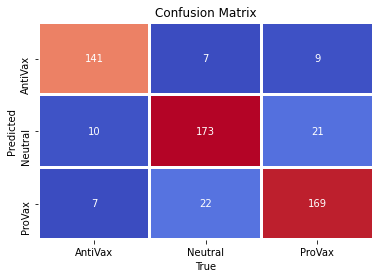

In [27]:
y_map_inv = {
    0: 'ProVax',
    1: 'AntiVax',
    2: 'Neutral'
}


sns.heatmap(
    pd.crosstab(df_test['ypred_cat'].map(y_map_inv), df_test['Sentiment_Cat'].map(y_map_inv)),
    annot=True,
    fmt='0.0f',
    cbar=False,
    linewidth=2,
    cmap='coolwarm'     
)

plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix');

In [28]:
y_test = df_test['Sentiment_Cat'].map(y_map_inv)
y_pred = df_test['ypred_cat'].map(y_map_inv)
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Confusion Matrix

[[141  10   7]
 [  7 173  22]
 [  9  21 169]]

Accuracy: 0.86

Micro Precision: 0.86
Micro Recall: 0.86
Micro F1-score: 0.86

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.86
Weighted Recall: 0.86
Weighted F1-score: 0.86

Classification Report

              precision    recall  f1-score   support

     Class 1       0.90      0.89      0.90       158
     Class 2       0.85      0.86      0.85       202
     Class 3       0.85      0.85      0.85       199

    accuracy                           0.86       559
   macro avg       0.87      0.87      0.87       559
weighted avg       0.86      0.86      0.86       559



# Test Prediction

In [41]:
test_data = pd.read_csv("irmidis-2021-task2-test.csv")
from sklearn.utils import shuffle
test_data = shuffle(test_data)

In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1004 to 1312
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1600 non-null   int64 
 1   tweet   1600 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.5+ KB


In [43]:
test_data['tweet_cleaned'] = test_data['tweet'].apply(remove_url)
test_data['tweet_cleaned'] = test_data['tweet_cleaned'].apply(clean)
test_data['tweet_cleaned'] = test_data['tweet_cleaned'].apply(remove_emojis)
x_test = test_data['tweet_cleaned'].values

In [44]:
x_test_data_enc = fast_encode(x_test, fast_tokenizer, maxlen=max_len)

In [45]:
ypred = model.predict(x_test_data_enc)
# df_test['ypred'] = ypred
# df_test['ypred_cat'] = np.where(df_test['ypred']>=0.5, 1, 0)
test_data['ypred_cat'] = np.argmax(ypred, axis=1)

In [46]:
test_data

,id,tweet,tweet_cleaned,ypred_cat
1004,1344699749639868423,The first people in the #faroeislands have bee...,The first people in the faroeislands have been...,2
887,1326302044521525248,@IvankaTrump Once again? He had absolutely NOT...,IvankaTrump Once again He had absolutely NOTHI...,2
171,1330189336579543041,@g20org @ksaembassyCHINA Saudi people are prou...,gorg ksaembassyCHINA Saudi people are proud of...,0
1495,1249177862227230720,@ashutosh2704 @SUDBIJALWAN Virus named 'bhakt'...,ashutosh SUDBIJALWAN Virus named bhakt is more...,0
939,1327401042359824389,@Magooe @PattyArquette @senatemajldr Everyone ...,Magooe PattyArquette senatemajldr Everyone kno...,2
...,...,...,...,...
1090,1319963181477933056,Dewine? Why are people so mad at you. You a...,Dewine Why are people so mad at you You are...,1
697,1293792005932421120,"""FG denies placing 9rder for Russian vaccine"" ...",FG denies placing rder for Russian vaccine Gua...,2
323,1344489868450172930,@menakadoshi @ShekharGupta and gang as usual w...,menakadoshi ShekharGupta and gang as usual wil...,2
808,1280763211629957120,@MoneylineMark What do you think about NVAX?? ...,MoneylineMark What do you think about NVAX The...,2


In [47]:
test_data['label'] = test_data['ypred_cat'].map(y_map_inv)

In [48]:
test_data

,id,tweet,tweet_cleaned,ypred_cat,label
1004,1344699749639868423,The first people in the #faroeislands have bee...,The first people in the faroeislands have been...,2,Neutral
887,1326302044521525248,@IvankaTrump Once again? He had absolutely NOT...,IvankaTrump Once again He had absolutely NOTHI...,2,Neutral
171,1330189336579543041,@g20org @ksaembassyCHINA Saudi people are prou...,gorg ksaembassyCHINA Saudi people are proud of...,0,ProVax
1495,1249177862227230720,@ashutosh2704 @SUDBIJALWAN Virus named 'bhakt'...,ashutosh SUDBIJALWAN Virus named bhakt is more...,0,ProVax
939,1327401042359824389,@Magooe @PattyArquette @senatemajldr Everyone ...,Magooe PattyArquette senatemajldr Everyone kno...,2,Neutral
...,...,...,...,...,...
1090,1319963181477933056,Dewine? Why are people so mad at you. You a...,Dewine Why are people so mad at you You are...,1,AntiVax
697,1293792005932421120,"""FG denies placing 9rder for Russian vaccine"" ...",FG denies placing rder for Russian vaccine Gua...,2,Neutral
323,1344489868450172930,@menakadoshi @ShekharGupta and gang as usual w...,menakadoshi ShekharGupta and gang as usual wil...,2,Neutral
808,1280763211629957120,@MoneylineMark What do you think about NVAX?? ...,MoneylineMark What do you think about NVAX The...,2,Neutral


In [49]:
test_data.to_csv('test_data_prediction.csv', index = False)